In [4]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

df_ice = pd.read_csv('./icecream__utf8.csv')
df_ice

,年,月,アイスクリーム
0,2003,1,331
1,2003,2,268
2,2003,3,365
3,2003,4,492
4,2003,5,632
...,...,...,...
115,2012,8,1332
116,2012,9,849
117,2012,10,515
118,2012,11,326


<AxesSubplot:>

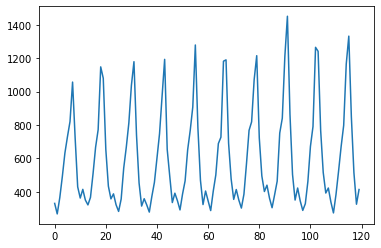

In [3]:
df_ice.アイスクリーム.plot()

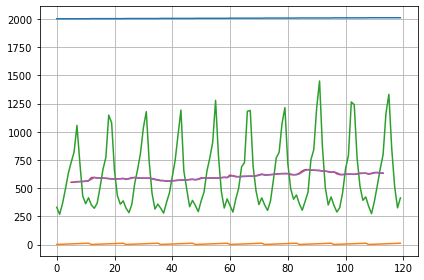

In [55]:
df_ma = df_ice.アイスクリーム.rolling(window=12).mean().shift(-6)
df_cma = df_ma.rolling(window=2).mean()

fig, ax = plt.subplots()
ax.grid()


ax.plot(df_ice)
ax.plot(df_ma)
ax.plot(df_cma)
fig.tight_layout()

In [41]:
df_ma = df_ice.アイスクリーム.rolling(window=12).mean().shift(-6)
df_cma = df_ma.rolling(window=2).mean()

df_cma

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
115   NaN
116   NaN
117   NaN
118   NaN
119   NaN
Name: アイスクリーム, Length: 120, dtype: float64

In [9]:
# 原系列（df_ice.アイスクリーム)/中心異動平均系列(df_cma)
df_orig_div_cma = df_ice.アイスクリーム / df_cma
df_orig_div_cma.values

array([       nan,        nan,        nan,        nan,        nan,
              nan, 1.48418198, 1.90022472, 1.29613606, 0.76877235,
       0.64653061, 0.73494687, 0.60512894, 0.54151776, 0.61927863,
       0.86126024, 1.13090781, 1.31190257, 1.95848735, 1.85129634,
       1.12327982, 0.7452243 , 0.6131887 , 0.66268147, 0.55446678,
       0.48621949, 0.60534125, 0.91394908, 1.12455216, 1.37597967,
       1.76098493, 2.00283126, 1.254314  , 0.77270789, 0.54314247,
       0.62480058, 0.56565657, 0.4919189 , 0.66110332, 0.81268524,
       1.0657225 , 1.31893322, 1.70839125, 2.08885971, 1.14285714,
       0.86007124, 0.58367111, 0.67751692, 0.60169063, 0.50555475,
       0.65975281, 0.78849408, 1.10602205, 1.30270691, 1.53887437,
       2.16840916, 1.32796951, 0.79150552, 0.54404254, 0.68024354,
       0.57182206, 0.46998028, 0.66753873, 0.83268698, 1.14206782,
       1.20173566, 1.95197138, 1.96248196, 1.13979381, 0.78410959,
       0.57774463, 0.66604102, 0.56536913, 0.49085386, 0.62291

In [38]:
import numpy as np

s_index = np.zeros(12)
counter = np.zeros(12, dtype='i')
df_orig_div_cma = df_ice.アイスクリーム / df_cma
orig_div_cma = df_orig_div_cma.values
a = orig_div_cma[0*12:(0+1)*12]
mask = a!=a
counter += np.where(mask, 0, 1)
s_index += np.where(mask, 0, a)
s_index /= counter

bb = np.array([22, 22, 22, 22], dtype=np.float)
cc = np.array([2, 2, 2, 2], dtype=np.float)
bb /= cc
bb

/var/folders/qt/nt_r7qy14vj848kplz4kvgxmz_q9b0/T/ipykernel_66985/233835218.py:11: RuntimeWarning: invalid value encountered in true_divide
  s_index /= counter
/var/folders/qt/nt_r7qy14vj848kplz4kvgxmz_q9b0/T/ipykernel_66985/233835218.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bb = np.array([22, 22, 22, 22], dtype=np.float)
/var/folders/qt/nt_r7qy14vj848kplz4kvgxmz_q9b0/T/ipykernel_66985/233835218.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.


array([11., 11., 11., 11.])

1.  中心化移動平均を求める
2. 原系列を中心化移動平均で除した値を求めて１００倍する：SxI系列の作成
3. 手順２で求めた値から12ヶ月ごとの季節指数を求める。→月毎の平均値を求めてその和が1200になるように調整する：S系列の作成
4. 原系列を季節指数で割って１００をかけて、季節調整すみの値とする：TxIの作成

In [42]:
# 原系列
df_ice = pd.read_csv('./icecream__utf8.csv')
# 12ウィンドウサイズ分の移動平均を取る
df_ma = df_ice.アイスクリーム.rolling(window=12).mean().shift(-6)
df_cma = df_ma.rolling(window=2).mean()


# 原系列（df_ice.アイスクリーム)/中心異動平均系列(df_cma)
df_orig_div_cma = df_ice.アイスクリーム / df_cma

# 月毎に加算
orig_div_cma = df_orig_div_cma.values
s_index = np.zeros(12)
counter = np.zeros(12, dtype='i')
for idx in range(len(orig_div_cma)//12):
    # 12ヶ月ごとにデータを抽出
    cut_orig_div_cma = orig_div_cma[idx*12:(idx+1)*12]
    # NaNはTrue、それ以外false
    mask = cut_orig_div_cma!=cut_orig_div_cma
    # NaNを0、それ以外1にして加算
    counter += np.where(mask, 0, 1)
    s_index += np.where(mask, 0, cut_orig_div_cma)
# 加算結果の各月平均
s_index /= counter
# 全体を1200に合わせて季節指数を計算
s_index = s_index / s_index.sum() * 1200

In [44]:
# 季節指数を原系列の要素と対応させる
# 原系列のスタートが1月なのでnumpy.tileで12ヶ月分の季節指数を繰り返すだけで良い
tiled_s_index = np.tile(s_index, len(orig_div_cma)//12)

# 季節調整すみ系列の計算
df_adjusted_series = df_ice.アイスクリーム / tiled_s_index * 100

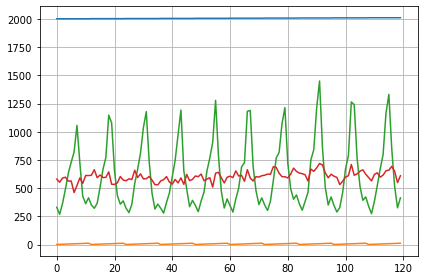

In [52]:
fig, ax = plt.subplots()
ax.grid()
ax.plot(df_ice)
ax.plot(df_adjusted_series)
fig.tight_layout()
plt.show()


In [56]:
s_index

array([ 57.05374632,  48.4935788 ,  61.87100094,  82.34066594,
       112.21945388, 129.50185932, 178.03993789, 201.78512364,
       122.39560152,  79.21403276,  59.2923283 ,  67.79267067])